In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
File = '/home/gramx/Desktop/cosmology_codes/light_cones/lcone/lightcone_physical.cbin'
f = open (File, 'rb')

N = np.fromfile (f, count=3, dtype=np.uint32)
Nx,Ny,Nz = N
print(N.dtype)

lc_data = np.fromfile (f, count=Nx*Ny*Nz, dtype=np.float32)

f.close()
lc_data = lc_data.reshape ((Nx,Ny,Nz), order='C')
print(lc_data.shape)
print(N)
#print(grid_size)

uint32
(232, 232, 339)
[232 232 339]


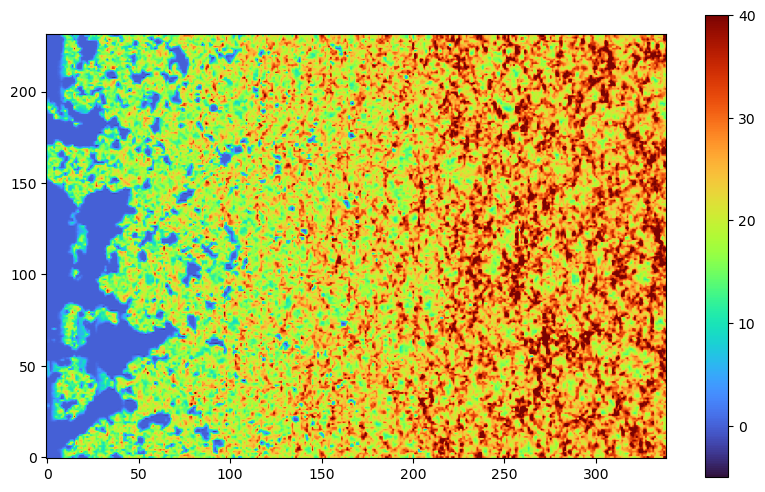

In [5]:
fig,ax = plt.subplots(figsize=(10,6))
p0 = ax.imshow(lc_data[0,:,:],origin='lower',cmap='turbo',vmax=40)
fig.colorbar(p0)

In [6]:
file1=open("/home/gramx/Desktop/cosmology_codes/light_cones/lcone/data.dat")
#print (file1.read())
n_fraction=np.loadtxt(file1)
print(n_fraction.shape)
file1.close()

file2=open("/home/gramx/Desktop/cosmology_codes/light_cones/lcone/data.dat")
z_data=np.loadtxt(file2)
print(z_data.shape)
file2.close()

print(n_fraction[0,3]-n_fraction[16,3])
print(n_fraction[:,3])


(340, 4)
(340, 4)
2.9506321475619757
[172.36759032 172.1824189  171.99734841 171.81237885 171.62751022
 171.44274252 171.25807575 171.07350993 170.88904506 170.70468112
 170.52041809 170.33625596 170.1521947  169.9682343  169.78437475
 169.60061605 169.41695817 169.23340111 169.04994488 168.86658945
 168.68333484 168.50018105 168.31712806 168.13417589 167.95132454
 167.76857402 167.58592434 167.40337549 167.22092746 167.03858023
 166.85633378 166.6741881  166.49214317 166.31019897 166.12835551
 165.94661278 165.76497075 165.58342944 165.40198884 165.22064895
 165.03940976 164.85827128 164.67723352 164.49629648 164.31546017
 164.1347246  163.95408976 163.77355562 163.59312218 163.4127894
 163.23255729 163.05242582 162.87239498 162.69246476 162.51263516
 162.33290616 162.15327777 161.97374998 161.79432278 161.61499619
 161.43577021 161.25664483 161.07762007 160.89869593 160.71987241
 160.54114952 160.36252722 160.1840055  160.00558435 159.82726375
 159.64904371 159.4709242  159.29290523 

In [7]:
#Non-overlap frequency bins

# n=0
# k=0
# b_width=7
# freq_array=np.array([])                #frequency indices of chunks
# fz_array=np.array([])                  #redshift indices of chunks
# k_array=np.array([])                   #space indices of chunks 
# freq_array=np.append(freq_array,n_fraction[0,3]) 
# for i in range(len(n_fraction[:,3])):
#     if n_fraction[k,3]-n_fraction[n+i,3]>=b_width:
#         k_array=np.append(k_array,k)
#         freq_array=np.append(freq_array,n_fraction[n+i,3])
#         fz_array=np.append(fz_array,n_fraction[n+i,0])
#         k=n+i
#         #k_array=np.append(k_array,int(k))
# kin_array=[int(float) for float in k_array]  
# print(freq_array)
# print(k_array)

In [8]:
#overlapping frequency bins
n=0
k=0
b_width=7
freq_array=np.array([])                #frequency indices of chunks
fz_array=np.array([])                  #redshift indices of chunks
k_array=np.array([])                   #initial indices of the chunk 
ind_array=np.array([])                 #space indices of chunk
freq_array=np.append(freq_array,n_fraction[0,3])
k_array=np.append(k_array,0)
fz_array=np.append(fz_array,n_fraction[0,0])
ind_array=np.append(ind_array,0)
for i in range(len(n_fraction[:,3])):
    if n_fraction[k,3]-n_fraction[n+i,3]>=b_width:
        #k_array=np.append(k_array,k)
        freq_array=np.append(freq_array,n_fraction[n+i,3])
        fz_array=np.append(fz_array,n_fraction[n+i,0])
        ind_array=np.append(ind_array,n+i)
        k=int((n+i)-(((n+i)-k)/2))
        k_array=np.append(k_array,k)
iind_array=[int(float) for float in ind_array] 
kin_array=[int(float) for float in k_array]  
print(len(freq_array))
print(len(iind_array))

16
16


In [9]:
print(freq_array)
print(iind_array)
print(kin_array)
print(fz_array)
print((n_fraction[iind_array[2],3]+n_fraction[kin_array[1],3])/2)

[172.36759032 165.22064895 161.79432278 158.22690257 154.69969438
 151.21264903 147.59443888 144.18962466 140.65768533 137.16988471
 133.56329564 130.16575636 126.65366651 123.03357902 119.6202633
 116.10337104]
[0, 39, 58, 78, 98, 118, 139, 159, 180, 201, 223, 244, 266, 289, 311, 334]
[0, 19, 38, 58, 78, 98, 118, 138, 159, 180, 201, 222, 244, 266, 288, 311]
[ 7.254452    7.61151441  7.79388087  7.99214974  8.19717395  8.40926575
  8.6399296   8.86756158  9.11533779  9.37253916  9.65262723  9.93067824
 10.23378453 10.56432261 10.89430587 11.25459681]
165.33045611900758


In [10]:
def chunk(kin_array,iind_array):
    f_array=np.array([])
    z_array=np.array([])
    xn_array=np.array([])
    for i in range(len(kin_array)-1):
        freq=(n_fraction[iind_array[i+1],3]+n_fraction[kin_array[i],3])/2
        z=(n_fraction[iind_array[i+1],0]+n_fraction[kin_array[i],0])/2
        xn=1-((n_fraction[iind_array[i+1],1]+n_fraction[kin_array[i],1])/2)
        light_cone=lc_data[:,:,kin_array[i]:iind_array[i+1]]
        shape=np.array([])
        shape=np.array(light_cone.shape)
        print(shape)
        light_cone1 = light_cone.reshape (shape[0]*shape[1]*shape[2], order='C')
    
        def binarylcmap(np_lcmap,filename):
            with open(filename,"wb") as f:
                f.write(np.array(shape[0],dtype=np.uint32))
                f.write(np.array(shape[1],dtype=np.uint32))
                f.write(np.array(shape[2],dtype=np.uint32))
                data=np_lcmap.tobytes()
                f.write(data)
            
        #binarylcmap(light_cone1,"lc%f.cbin"%freq)
        f_array=np.append(f_array,freq)
        z_array=np.append(z_array,z)
        xn_array=np.append(xn_array,xn)
    
    print(f_array)
    print(z_array)
    
    return f_array,z_array,xn_array
        
    

In [11]:
ch=chunk(kin_array,iind_array)

[232 232  39]
[232 232  39]
[232 232  40]
[232 232  40]
[232 232  40]
[232 232  41]
[232 232  41]
[232 232  42]
[232 232  42]
[232 232  43]
[232 232  43]
[232 232  44]
[232 232  45]
[232 232  45]
[232 232  46]
[168.79411963 165.33045612 161.8144457  158.24700858 154.7197758
 151.14706663 147.70113684 144.21170856 140.67975468 137.11049048
 133.66782053 130.18992437 126.59966769 123.1369649  119.64662389]
[ 7.43298321  7.60973352  7.79711142  7.99552741  8.20070774  8.41855178
  8.63841366  8.8720463   9.12005037  9.38398251  9.6516087   9.93671811
 10.24750042 10.5640452  10.90212357]


In [12]:
ch[0]

array([168.79411963, 165.33045612, 161.8144457 , 158.24700858,
       154.7197758 , 151.14706663, 147.70113684, 144.21170856,
       140.67975468, 137.11049048, 133.66782053, 130.18992437,
       126.59966769, 123.1369649 , 119.64662389])

In [15]:
LCS=np.array([])
ff=np.array([])

In [16]:
for i in range(len(ch[0])):
    i=i+1
    File = '/home/gramx/Desktop/cosmology_codes/Modified/frequency_lc/overlap/7Mhz/{}Cluster_stat_iso1.000000'.format(i)
    f = open (File,'r')
    z=f.readlines()
    cluster=z[2].split()
    #print(cluster[7])
    ff=np.append(ff,cluster[4])
    LCS=np.append(LCS,cluster[7])

    
    

In [18]:
print(len(ff))

15


In [19]:
LCS_array= [float(string) for string in LCS]
ff_array=[float(string) for string in ff]
print(ff_array)
print(ch[1])

[0.4714215753529071, 0.2785484122991554, 0.1386709460463734, 0.0797711058263971, 0.0408572384066587, 0.0191790406310722, 0.0093402888547316, 0.004150653275579, 0.0016137251571259, 0.0005171895307358, 0.0001369666509969, 4.26474164955e-05, 1.44503897477e-05, 5.7801558991e-06, 0.0]
[ 7.43298321  7.60973352  7.79711142  7.99552741  8.20070774  8.41855178
  8.63841366  8.8720463   9.12005037  9.38398251  9.6516087   9.93671811
 10.24750042 10.5640452  10.90212357]


In [20]:
z=np.zeros((len(LCS_array),5))
# print(z)
z[:,0]=ch[1]
z[:,1]=ch[2]
z[:,2]=ch[0]
z[:,3]=LCS_array
z[:,4]=ff_array
print(z)
np.savetxt('frequency_ol_7Mhz.txt', z)

[[7.43298321e+00 3.21442799e-01 1.68794120e+02 9.83137256e-01
  4.71421575e-01]
 [7.60973352e+00 4.44704854e-01 1.65330456e+02 9.42817905e-01
  2.78548412e-01]
 [7.79711142e+00 5.36924883e-01 1.61814446e+02 5.79528593e-01
  1.38670946e-01]
 [7.99552741e+00 6.57994154e-01 1.58247009e+02 4.07990963e-02
  7.97711058e-02]
 [8.20070774e+00 7.18492999e-01 1.54719776e+02 2.64994771e-02
  4.08572384e-02]
 [8.41855178e+00 7.81019451e-01 1.51147067e+02 1.46961535e-02
  1.91790406e-02]
 [8.63841366e+00 8.30974565e-01 1.47701137e+02 1.35358044e-02
  9.34028885e-03]
 [8.87204630e+00 8.66956114e-01 1.44211709e+02 1.92902057e-02
  4.15065328e-03]
 [9.12005037e+00 9.04280507e-01 1.40679755e+02 2.02850877e-02
  1.61372516e-03]
 [9.38398251e+00 9.27694571e-01 1.37110490e+02 1.92147034e-02
  5.17189531e-04]
 [9.65160870e+00 9.50622854e-01 1.33667821e+02 4.41640379e-02
  1.36966651e-04]
 [9.93671811e+00 9.60686806e-01 1.30189924e+02 3.96039604e-02
  4.26474165e-05]
 [1.02475004e+01 9.72338682e-01 1.265996

In [18]:
int(3.5)

3